# More on Python: 
## Object Oriented Programming and analyzing data with multiple files

## Lesson Objectives
- to give an overview of object oriented programming in Python so that students can:
    - recognize the basic elements of OOP: classes, objects, instance methods, attributes 
    - Understand and review scripts that use OOP
    - learn to write simple OOP
        - create a class
        - define methods within classes
        - instantiate objects
- Use libraries to access multiple files and perform simple analysis
     - get a list of filenames that match a wildcard pattern.
     - Write a for loop to process multiple files

## Object Oriented Programming

Python is an object-oriented language. Object Oriented Programming is an approach to programming in which properties and behaviors are bundled into individual `objects`.

In the real world, an object has some properties and functions, e.g. a car has properties (color, model, engine type, etc.) and functions (it can move, speed up, brake, etc.) or an email has recipient list, subject, body, etc., and behaviors like adding attachments and sending; or a person who has name, height, weight, address and can walk, talk, laugh, etc. 

We can have the same approach in desigining programs based on objects that represent both properties and functions that can be applied to those properties. This can be thought of as calling for logical consistency, i.e. variables and functions may be grouped together because they are connected under a logical unit. If you have data and functions which can be combined logically, then they should be encapsulated in a `class`.

As we briefly mentioned in the previous session, we have been already using the OOP paradigm when accessing attributes of lists for example, or functions (aka methods) from numpy. Let's learn more:

## Classes and Objects
**Classes** are a template to create new objects of a certain type. It is a data structure that allows the user to specify the properties and functions needed to create this type of object. In Python, class properties are called `attributes` and class functions are called `methods`. 

**Objects** are **instances** of a specific **class**. e.g. if each *person* is an _instance_ of the *human beings* class, then Mana who is 170 cm tall and has dark hair is an instance of human() class. 

In summary:
- A `class` provides the blueprint or structure to create an object
- an `object` is an instance of a class which has: 
    - properties, that are called **attributes**
    - functions, that are called **methods**

### Defining a class in Python
Unsuprisingly, a class is defined by the keyword `class`. 

For example, a very basic class (named `MyClass`) with one attribute (named `variable`) and one method (named `function`) can be defined like this:

In [131]:
class MyClass:
    variable = "something"

    def function(self):
        print("Printing this message is the only function of this class")

We will explain the `self` shortly, but first let's see how we create a new object of this class, which is called **instantiating an object**.

In [132]:
myobject = MyClass() # now myobject is an instance of MyClass and contains both the variable and the function for that class

In [133]:
# try pressing the tab after typing "myobject." to see what attributes and methods are available
myobject.function() 
myobject.variable

Printing this message is the only function of this class


'something'

Let's work with a more meaningful example. Assume we want to file the experimental subjects of an ongoing study on migraines: 

We want to define a class called `Subject` with attributes such as study name, experimenter name, ID, first name, last name, date of admission and a function that will just print out the full name of the subject. 
Suppose we want to create two objects: 

| ID | fname | lname | date_of_admission |
|------|------|------|------|
| 111  |Jane |Doe | 2019_01_01 |
| 112  |John | Smith | 2019_01_09 |

In [134]:
# first we need to define a class. 
# If you want to create an empty class at first, you use the command "pass" inside the class, 
# because otherwise Python expects you to type something there
class Subject:  
    pass  

In [135]:
# We want the Class to have attributes: fname, lname, ID, and data_of_admission. 
# we create the two instances and call them S1 and S2
S1 = Subject()
S1.fname = "Jane"
S1.lname = "Doe"
S1.ID = 111
S1.date_of_admission = "2019_01_01"

S2 = Subject()
S2.fname = "John"
S2.lname = "Smith"
S2.ID = 112
S2.date_of_admission = "2019_01_09"

In [136]:
# you can use these objects in any form. Let's say we want to bring up some info about subject 1
print(S1.fname,S1.lname)

Jane Doe


We can define a method in this class to print the full name. 
Let's rewrite the class and then run the same code as above to create the two objects again:

In [137]:
class Subject:
    def fullname(self):
        print(self.fname,self.lname)

You probably now appreciate the use of `self`. Since the two instances have different names S1 and S2, we need a general term like `self` to represent both of them. The job of `self` is to link any instance name with the Class and play the role of that instance name inside the class. 

In [138]:
# since we rewrote the class, we have to fill in the attributes again
# otherwise, they will not have access to the new method fullname
S1 = Subject()
S1.fname = "Jane"
S1.lname = "Doe"
S1.ID = 111
S1.date_of_admission = "2019_01_01"

S2 = Subject()
S2.fname = "John"
S2.lname = "Smith"
S2.ID = 112
S2.date_of_admission = "2019_01_09"

Now if we look at the objects it has a method + the attributes: 

In [139]:
S2.fullname()

John Smith


## Constructor i.e. the `__init__()` method

You might be thinking the above approach seems inefficient and you are right. We don't want to repeatedly filli in the attributes individually, both boring and prone to typos.

We actually don't need to. We can use a *constructor* to pass the attributes needed when initializing/instantiating a new unique instance of a class.
Define an `__init__()` method which requires at least one other argument (as well as `self`). 

Note that it allows you to take data from the arguments passed and set attributes for that instance based on the data. It's up to you to decide what information you'd like to store and make accessible in your object.

In [140]:
class Subject: 
    def __init__(self,fname,lname,ID,date_of_admission):
        self.fname = fname
        self.lname = lname
        self.full_name = fname + ' ' + lname # notice that we can perform operations to create new attributes from the arguments passed
        self.ID = ID
        self.date_of_admission = date_of_admission
        
    def fullname(self):
        print(self.full_name)
    

We can use this to fill in attributes for new objects of a class all at once, at the time of instantiation, by passing in the data in the correct order when the object is created. 

**Note:** We never actually have to call `__init__()`. If we defined an `__init__()` function, it is done automatically when creating a new object.

In [141]:
# let's fill in the same subjects' info 
S1 = Subject("Jane","Doe",111,"2019_01_01")
S2 = Subject("John","Smith",112,"2019_01_02")

In [142]:
# now the method 'fullname' should give the same info as before:
S1.fullname()

Jane Doe


As we learned by this example, the __init__ method is the initializer that you can later use to instantiate objects.

## Challenge 1

1. Define a `Cat` class along with a constructor that initializes each object with the following attributes:
    - name
    - eye_color
    - hair_type
    - behaviour
    - price

2. Also include the following method definition in your `Cat` class:
```
def description(self):
        desc_str = f"{self.name} is a {self.eye_color}-eyed {self.behaviour} cat with {self.hair_type} worth {self.price}."
        return desc_str
```
*Side note: the above uses "f-string", a type of string formatting in Python which is a quick and efficient way to build up strings that make use of variables or expressions without having to add them together manually as we have in the past (e.g. self.name + " is a " + self.eye_color + ...). [Read more here](https://docs.python.org/3/reference/lexical_analysis.html#f-strings)*

3. Create two instances with: 
    - cat_1: Russian Blue, green eyes, reserved, short coat, price: 1000.0 CAD
    - cat_2: Birman, blue eyes, cuddly, long hair, price: 600.0 CAD

4. Try calling the `description()` method on both `cat_1` and `cat_2`.


## Relationships between objects

We can have relationships between sets of objects. All the attributes and methods of the relative are accessible through the object: 

In [143]:
# define a feature that relates the two objects, here we can literally say relative
S1.relatives = S2

In [144]:
S1.relatives.fullname()

John Smith


## Class attributes and Class methods

So far we have learned how to create a class and its instances, as well as to define and access an objects attributes and methods. Let's learn a few more features so that if we encounter them while reviewing a collaborator's script or an open-source code, we understand what's going on. 

Let's work with another example, programing for a bank. 

Let's define a class called *Client* in which a new instance stores a client's name, balance, and uses this information to determine the account level.

In [145]:
class Client:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100 # there is a $100 bonus for new sign-ups
        
        # define account level
        if self.balance < 5000:
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"

Now, lets try creating some new clients named John_Doe, and Jane_Defoe.


In [146]:
c1 = Client("John Doe", 500)
c2 = Client("Jane Defoe", 150000)

We can see the attributes of John_Doe, or Jane_Defoe by calling them as we did before:

In [147]:
print(c1.name)
print(c2.level)
print(c2.balance)

John Doe
Advanced
150100


We can also add, remove or modify attributes as we like:

In [148]:
c1.email = "jdoe@email.com"
c2.email = "jdefoe23@email.com"

In [149]:
c1.email

'jdoe@email.com'

In [150]:
# if you wanted to delete an attribute
del c1.email

In [151]:
# we get an "AttributeError" because 'email' no longer exists for c1
c1.email

AttributeError: 'Client' object has no attribute 'email'

### Class Attributes

A class attribute is an attribute set at the class-level rather than the instance-level, such that the value of this attribute will be the same across all instances.

For our *Client* class, we might want to set the name of the bank, and the location, which would not change from instance to instance.

In [124]:
class Client:
    bank = "Branch 001"
    location = "Toronto, ON"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100 # there is a $100 bonus for new sign-ups
        
        # define account level
        if self.balance < 5000:
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"

In [93]:
c1 = Client("John Doe", 500)
c2 = Client("Jane Defoe", 150000)

### more on methods

In the case of our 'Client' class, we may want to update a person's bank account once they withdraw or deposit money. Let's create these methods below.

In [79]:
# Use the Client class code above to now add methods for withdrawal and depositing of money
class Client:
    bank = "Branch 001"
    location = "Toronto, ON"
    
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100
        
        #define account level
        if self.balance < 5000:
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
            
    def deposit(self, amount):
        '''
        This function adds amount deposited to self.balance and returns the updated balance.
        '''
        self.balance = self.balance + amount
        return self.balance
    
    def withdraw(self, amount):
        '''
        This function subtracts amount withdrawn from self.balance and returns the updated balance.
        Amount must be less than starting balance.
        '''
        if amount > self.balance:
            print("Insufficient funds for withdrawal. No money withdrawn.")
        else:
            self.balance = self.balance - amount
        return self.balance
    


Let's try creating Joh Doe's account again and depositing some money.

In [80]:
C1 = Client("John Doe", 500)

In [81]:
C1.level

'Basic'

In [82]:
C1.deposit(150000)

150600

In [83]:
C1.level

'Basic'

That doesn't seem right. John's balance is now over $15 000, but his level is still "Basic". That's because the level is set when we first instantiate the `C1` object. To solve this, we could do the same check after every deposit or withdrawal. 

However, we can write this class in a more efficient way. By moving the code that sets the account level into it's own method, we can re-use the function in other places, so we don't have redundant every time we update the balance.

In general, if you're performing the same operations over and over, you might want to package that code into a function/method.

In [97]:
class Client:
    bank = "Branch 001"
    location = "Toronto, ON"
    

    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100
        self.level = None
        self.update_account_level()
        
    def update_account_level(self):
        '''
        Checks balance and updates account level.
        '''
        if self.balance < 5000: 
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else: 
            self.level = "Advanced"
        
    def deposit(self, amount):
        '''
        Adds amount deposited to self.balance and returns the updated balance.
        '''
        self.balance = self.balance + amount
        self.update_account_level()          
        return self.balance
    
    def withdraw(self, amount):
        '''
        Subtracts amount withdrawn from self.balance and returns the updated balance.
        Amount must be less than starting balance.
        '''
        if amount > self.balance:
            print("Insufficient funds for withdrawal. No money withdrawn.")
        else:
            self.balance = self.balance - amount
            self.update_account_level()        
        return self.balance
    

Let's try depositing to John's account again and seeing if it updates his level.

In [98]:
C1 = Client("John Doe", 500)

In [99]:
C1.level

'Basic'

In [100]:
C1.deposit(150000)

150600

In [101]:
C1.level

'Advanced'

## Analyzing Data

We learned that Python is an open source language that many programmers have contributed in creating good tools written on OOP approach as `libraries` that can be called upon when needed. 
The first step in analysing any data is to load it to python, which we can do using libraries. 

We got familira with NumPy (Numerical Python), which is a library for analysing numbers, especially if you have matrices or arrays. Once we’ve imported the library, we can ask the library to read our data file for us as the first step.


In [2]:
import numpy as np

### Loading numerical data into Python
Scenario: We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format.
(You can download them from Quercus). 


a good practice is to setup your project directory to have a folder for data, and a folder for scripts. 

Project
|__ scripts
|__ data

now, if you have copied the data in the data folder, and your jupyter notebook is in the scripts folder, you can load the data by a *relative path* (which we learned in bash lesson). 

In [5]:
# assign the filename 
filename = 'data/inflammation-01.csv'

# load the file by calling the function 'loadtxt' from numpy library
np.loadtxt(filename, delimiter = ',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

numpy.loadtxt has two parameters: the name of the file we want to read and the delimiter that separates values on a line. These both need to be character strings (or strings for short), so we put them in quotes.

Since we haven’t told it to do anything else with the function’s output, the notebook displays it. In this case, that output is the data we just loaded. By default, only a few rows and columns are shown (with ... to omit elements when displaying big arrays). Note that, to save space when displaying NumPy arrays, Python does not show us trailing zeros, so 1.0 becomes 1..


Our call to numpy.loadtxt read our file but didn’t save the data in memory. To do that, we need to assign the array to a variable as we have learned before:

In [6]:
data = np.loadtxt(filename, delimiter = ',')

In this dataset, each row holds information for a single patient, and columns represent successive days. Each number represents the number of inflammation bouts that a particular patient experienced on a given day. 

> ## Challenge 

> How many patients this study has recruited, and for how many days data was collected?

> to quickly review what we have already explored in the previous session: calculating the mean and standard deviation of inflammation bouts for each patient.

In [8]:
# Answer: 
No_Patients, No_days = data.shape

print('number of patients:', No_Patients)
print('number of days:', No_days)


number of patients: 60
number of days: 40


In [12]:
mean_inflamamtion_per_patient, std_inflammation_per_patient = np.mean(data, axis = 1), np.std(data, axis = 1)
print(mean_inflamamtion_per_patient)
# to check you have one value per patient:
mean_inflamamtion_per_patient.shape 

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]


(60,)


### Loading multiple numerical datasets into Python

We need to process all our data files, and there is a better way to call by using the `glob` library.

The `glob` library contains a function, also called glob, that finds files and directories whose names match a pattern which we can define using wildcarts as we learned in the bash lesson. We can use this to get the names of all the CSV files in the current directory:

In [17]:
import glob
print(glob.glob('data/inflammation*.csv'))

['data\\inflammation-01.csv', 'data\\inflammation-02.csv', 'data\\inflammation-03.csv']


Let's say we want to compute the average of inflammation bouts for each patient for each of the inflammation datasets.  We can use the result of calling `glob` which is a list of file and directory paths  This means we can loop over it to execute the function we desire on each filename in turn.

In [21]:
import glob #note that we put these here so that this cell is standalone, but you don't need to repeat import as long as it is run once in the notebook, and that the kernel has not been restarted 
import numpy as np

filenames = sorted(glob.glob('data/inflammation*.csv')) # note: the list from glob is not necessarily sorted alphabetically, so we may like to use sorted
for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',') # note this time we used the keyword fname used by numpy, but it's not necessary since we put the filename first (in it's default position)
    mean_inflamamtion_per_patient = np.mean(data, axis = 1)
    print('Average inflammation per patient:\n', mean_inflamamtion_per_patient)

data\inflammation-01.csv
Average inflammation per patient:
 [5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]
data\inflammation-02.csv
Average inflammation per patient:
 [6.35  5.7   5.9   5.325 6.05  5.675 6.25  5.425 5.35  5.675 5.95  6.375
 5.475 6.075 6.35  5.725 6.025 6.025 6.    5.975 6.15  5.975 6.125 6.55
 6.25  6.725 5.325 5.15  6.    6.3   6.25  5.8   5.475 6.125 6.075 5.4
 6.075 5.45  6.175 6.2   6.175 6.1   5.725 6.375 6.025 5.8   5.8   6.825
 6.25  5.35  5.575 6.    5.1   5.475 6.9   6.025 6.025 6.55  7.2   6.925]
data\inflammation-03.csv
Average inflammation per patient:
 [4.    4.225 3.9   3.7   4.075 3.95  4.55  3.45  3.975 4.525 4.425 4.225
 3.85  4.925 4.5   3.22

## Generating one dataset from multiple files

Let's assume we want to put all the datasets together, here's a way to do it:

In [41]:
filenames = glob.glob('data/inflammation*.csv')

data_all_concat = np.empty([60,0]) # note that we have to allocate an empty array with the right dimensions
for filename in filenames:
    data = np.loadtxt(fname = filename, delimiter=',')
    data_all_concat = np.append(data_all_concat, data, axis=1)

data_all_concat.shape

(60, 120)

In [49]:
# we may not want to concatenate them, but add them as a seperate dimension:
data_all_stacked = np.empty([60,40,0]) # note that we have to allocate an empty array with the right dimensions
for filename in filenames:
    data = np.loadtxt(fname = filename, delimiter=',')
    data_all_stacked = np.dstack((data_all_stacked, data))

data_all_stacked.shape

(60, 40, 3)

# Generate composite statistics 

Let's assume the three datasets are data collected over the course of 40 days after a specific medication was administrated to the patients. So we want to average the three repetitions. We can do so righ in reading the files:

In [52]:
composite_data = np.zeros([60,40])

# sum each new file's data into composite_data as it's read
for filename in filenames:
    data = np.loadtxt(fname = filename, delimiter=',')
    composite_data = composite_data + data

# and then divide the composite_data by number of samples to store the average
composite_data = composite_data / len(filenames)       
composite_data.shape

(60, 40)

## Visualizing 

let's take advantage of plotting the results of what we are doing to understand better. we will learn more on visualizing in later lessons, this is only a taster. Here we are using the `matplotlib` library (which is the basis of Searborn library which we later use). 

We can add plotting of some stats of the inflamation over all patients in each dataset, within the loop that we call the files:

data\inflammation-01.csv


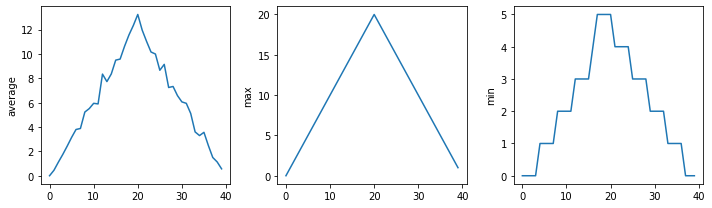

data\inflammation-02.csv


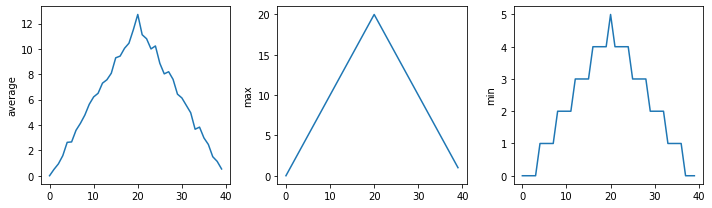

data\inflammation-03.csv


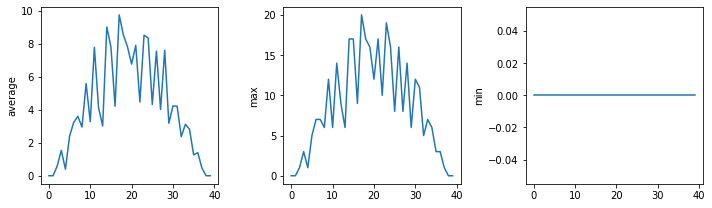

In [53]:
# plot the average over all patients for each dataset 
import matplotlib.pyplot as plt
%matplotlib inline

for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')
    fig = plt.figure(figsize=(10.0, 3.0))

    
    axes1 = fig.add_subplot(1, 3, 1) 
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()


In [ ]:
We can also visualise the composite stats dataset we made:
    

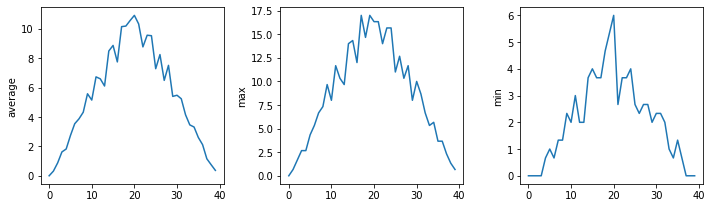

In [54]:
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(composite_data, axis=0))

fig.tight_layout()

matplotlib.pyplot.show()

> ## Challenge

> repeat the same plotting using `data_all_stacked` that we made above. 
> you can use the code for plotting as it is, you only need to know how to slice and access the data in data_all_stacked. 

## Acknowledgment: 
    parts adapted from:
        https://github.com/UofTCoders/studyGroup/blob/gh-pages/lessons/python/classes/lesson.md
        http://swcarpentry.github.io/python-novice-inflammation/06-files/index.html
        
            